In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

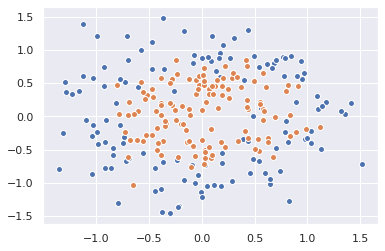

In [0]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=250, noise=0.25, factor=0.5, random_state=1)
plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], ec='w')
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], ec='w')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


tree = DecisionTreeClassifier(max_depth=3)
knn = KNeighborsClassifier()
svc = SVC()

voting_clf = VotingClassifier(estimators=[('tree_clf', tree), ('knn_clf', knn), ('svm_cfl', svc)], voting='hard')

In [0]:
from matplotlib.colors import ListedColormap

def draw_clf(model, X, y, meshgrid_steps=100, meshgrid_padding=0.05, fig_size=(6, 6), c_lightering=0.3, 
             feature_names=None, target_names=None, title=None, raw_data=False):

    x0_min, x0_max = np.min(X[:, 0]), np.max(X[:, 0])
    x1_min, x1_max = np.min(X[:, 1]), np.max(X[:, 1])

    x0_delta = (x0_max - x0_min) * meshgrid_padding
    x1_delta = (x1_max - x1_min) * meshgrid_padding

    x0_values = np.linspace(x0_min - x0_delta, x0_max + x0_delta, meshgrid_steps);
    x1_values = np.linspace(x1_min - x1_delta, x1_max + x1_delta, meshgrid_steps);

    xx0, xx1 = np.meshgrid(x0_values, x1_values)
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    z = z.reshape(xx0.shape)

    current_palette = np.array(sns.color_palette()[:len(np.unique(y))])
    lighter_pallete = ListedColormap(current_palette + (1 - current_palette) * c_lightering)

    if raw_data:
        return xx0, xx1, z, lighter_pallete

    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    ax.pcolormesh(xx0, xx1, z, cmap=lighter_pallete)

    labels = [f'class {x} - {target_names[x]}' if isinstance(target_names, (np.ndarray, list)) else f'class {x}' 
              for x in range(len(np.unique(y)))]

    for idx, lbl in enumerate(labels):
        ax.scatter(X[np.where(y==idx), 0], X[np.where(y==idx), 1], label=lbl, ec='w')
        ax.legend()

    ax.set_xlabel(feature_names[0] if feature_names else 'x0')
    ax.set_ylabel(feature_names[1] if feature_names else 'x1')
    
    if title:
        ax.set_title(title)

    return

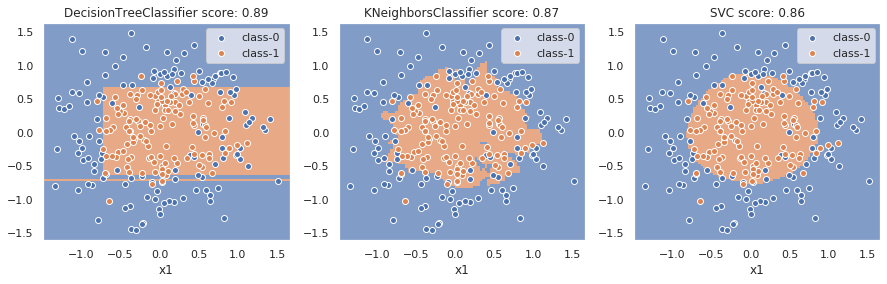

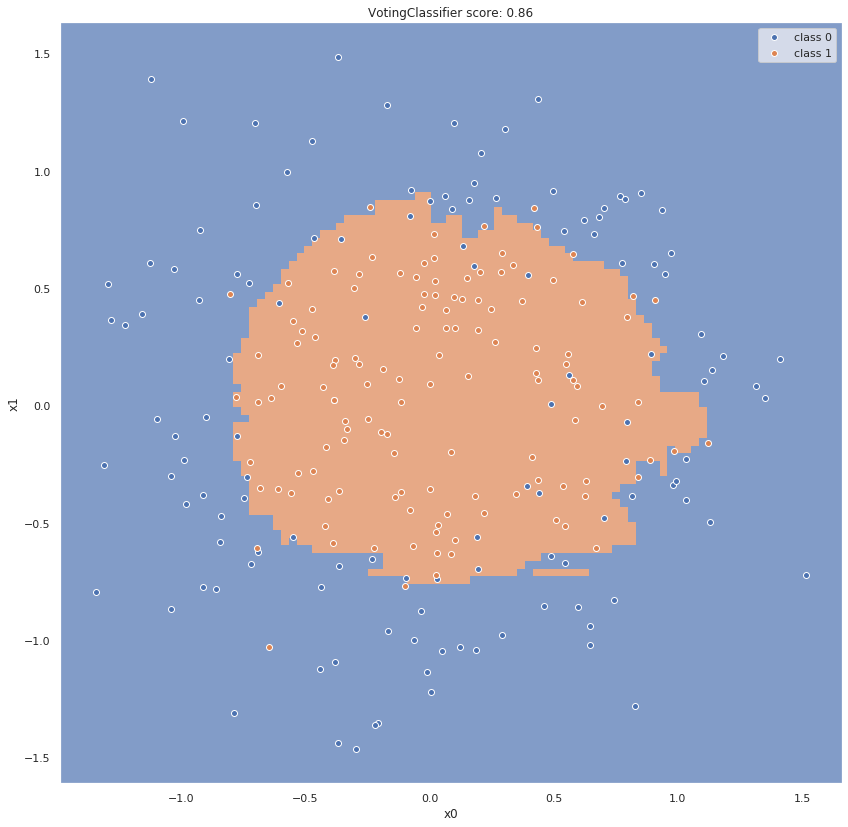

In [98]:
from sklearn.metrics import accuracy_score


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for clf, ax in zip((tree, knn, svc), axes):
    clf.fit(X_train, y_train)

    y_pred_test = clf.predict(X_test)
    test_score = accuracy_score(y_test, y_pred_test)

    xx0, xx1, z, pallete = draw_clf(clf, X, y, raw_data=True)
    
    ax.pcolormesh(xx0, xx1, z, cmap=pallete)
    ax.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], ec='w', label='class-0')
    ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], ec='w', label='class-1')

    ax.set_title(f'{clf.__class__.__name__} score: {test_score:.2f}')
    ax.set_xlabel('x0')
    ax.set_xlabel('x1')
    ax.legend()


voting_clf.fit(X_train, y_train)
test_score = accuracy_score(y_test, y_pred_test)
title = f'{voting_clf.__class__.__name__} score: {test_score:.2f}'
draw_clf(voting_clf, X, y, title=title, fig_size=(14, 14))
